Author:phanford & ksulaima

# PART 1

---



***Imports***

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpcolors

**Question 1**

In [0]:
matrix = np.matrix(np.random.random((8,3)))
matrix

matrix([[0.57192843, 0.95498672, 0.35104064],
        [0.22167252, 0.23566375, 0.75677387],
        [0.24329861, 0.37235859, 0.67302396],
        [0.15269115, 0.53129796, 0.53428371],
        [0.28320013, 0.6147891 , 0.8465339 ],
        [0.79901075, 0.06979268, 0.4243292 ],
        [0.83618794, 0.26392135, 0.33741259],
        [0.93695739, 0.43217776, 0.81620531]])

**Question 2**

In [0]:
np.arange(12).reshape((4,3))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

**Question 3**

In [0]:
def create_incremental(rows, columns, max = 1, max_num=None):
    if not max_num:
      max_num = columns
    return np.full((rows,columns), np.linspace(0, max, num=max_num))
example_arr = create_incremental(1, 10)
example_arr

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

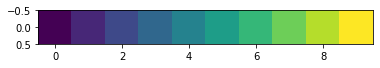

In [0]:
plt.imshow(example_arr)

**Question 4**

In [0]:
arr = create_incremental(10, 12, max = 11)
cropped_arr = arr[:4:1, range(8, 12)]
cropped_arr

array([[ 8.,  9., 10., 11.],
       [ 8.,  9., 10., 11.],
       [ 8.,  9., 10., 11.],
       [ 8.,  9., 10., 11.]])

**Question 5**

In [0]:
x = 257
y = 252
arr = np.matrix(np.full((y, x), create_incremental(1, x)))
arr

matrix([[0.        , 0.00390625, 0.0078125 , ..., 0.9921875 , 0.99609375,
         1.        ],
        [0.        , 0.00390625, 0.0078125 , ..., 0.9921875 , 0.99609375,
         1.        ],
        [0.        , 0.00390625, 0.0078125 , ..., 0.9921875 , 0.99609375,
         1.        ],
        ...,
        [0.        , 0.00390625, 0.0078125 , ..., 0.9921875 , 0.99609375,
         1.        ],
        [0.        , 0.00390625, 0.0078125 , ..., 0.9921875 , 0.99609375,
         1.        ],
        [0.        , 0.00390625, 0.0078125 , ..., 0.9921875 , 0.99609375,
         1.        ]])

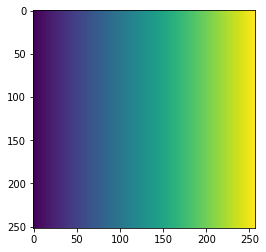

In [0]:
plt.imshow(arr)

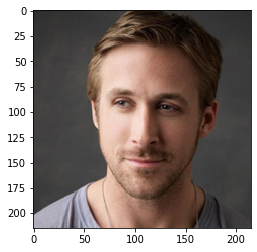

In [0]:

sample = plt.imread("https://i.imgur.com/gD3JIt9.png").copy()[:,:,:3]

plt.imshow(sample)

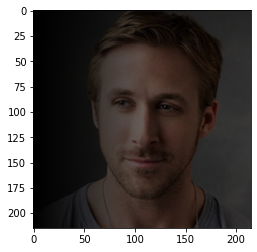

In [0]:
ex = sample.copy()
for i in range(0, sample.shape[0]):
  for j in range(0, sample.shape[1]):
    for k in range(0, sample.shape[2]):
      ex[i, j, k] *= arr[i, j]

plt.imshow(ex)

# Part 2
---



In [0]:
def adjust_value(img, amount, value, threshold=0, vign=False, vign_scale=0.3):
    img_hsv = mpcolors.rgb_to_hsv(img.copy())
    if vign:
        center_x = img.shape[0] / 2
        center_y = img.shape[1] / 2
    for i in range(img_hsv.shape[0]):
        for j in range(img_hsv.shape[1]):
            if img_hsv[i, j, value] > (threshold / 100):
                img_hsv[i, j, value] *= ((100 + amount) / 100)
            if vign:
                diff = ((i - center_x) ** 2) / (center_x ** 2) + ((j - center_y) ** 2) / (center_y ** 2)
                if diff > .97:
                    darkness = (1 - (diff - 0.98) ** vign_scale)
                    img_hsv[i, j, 2] *= darkness
    img = mpcolors.hsv_to_rgb(img_hsv)
    return img
def adjust_color(img, amount, color):
    fresh_img = img.copy()
    fresh_img[:, :, color] *= amount
    return fresh_img

def adjust_light(img, amount, threshhold = 0, vign = False, vign_scale=2.3 ):
    return adjust_value(img, amount, 2, threshhold, vign, vign_scale)
def adjust_saturation(img, amount, threshhold = 0, vign = False, vign_scale=2.3):
    return adjust_value(img, amount, 1, threshhold, vign, vign_scale)
def adjust_hue(img, amount, threshhold = 0, vign = False, vign_scale=2.3):
    return adjust_value(img, amount, 0, threshhold, vign, vign_scale);
def adjust_red(img, amount):
    return adjust_color(img, amount, 0)
def adjust_green(img, amount):
    return adjust_color(img, amount, 1)
def adjust_blue(img, amount):
    return adjust_color(img, amount, 2)

**Amaro filter**
This filter adds more light to the centre of the photo and darkens around the edges

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


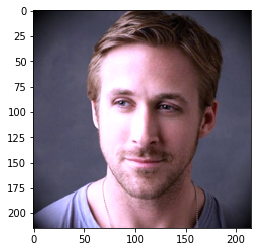

In [0]:
result = adjust_light(sample, 20, vign =True, vign_scale = 1.3)
result = adjust_blue(result, 1.3)
plt.imshow(result)

**Mayfair filter** Adds a warm pinkish tone and subtle vignetting that brightens the center of the photo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


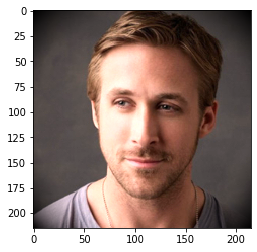

In [0]:
result = adjust_light(sample, 15,vign=True, vign_scale = 1.3)
result = adjust_red(result, 1.1)
result = adjust_green(result, 1.01)
plt.imshow(sample)
plt.imshow(result)



---


**Rise**
Rise gives your photos a nice glow and warmth by adding yellow tones. 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


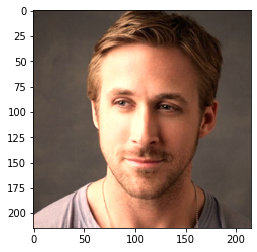

In [0]:
result = adjust_light(sample, 8)
result = adjust_red(result, 1.25)
result = adjust_green(result, 1.1)
plt.imshow(sample)
plt.imshow(result)

**Hudson**  emphasizes light in your image and gives your photos a bluish, colder feel. 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


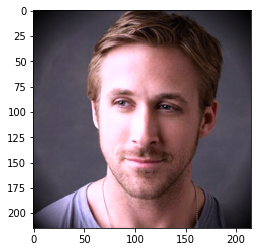

In [0]:
result = adjust_light(sample, 15, vign =True, vign_scale = .9)  
result = adjust_red(result, 1.05)
result = adjust_blue(result, 1.2)

plt.imshow(sample)
plt.imshow(result)

**HEFE**
Hefe slightly increases saturation and gives a warm fuzz tone to our photos. 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


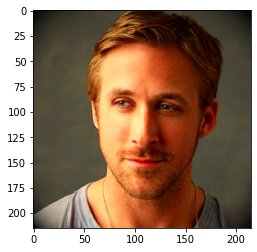

In [0]:
result = adjust_saturation(sample, 85, vign =True, vign_scale = 2)
result = adjust_light(result, 3)  
result = adjust_red(result, 1.2)
result = adjust_blue(result, .9)
result = adjust_green(result, 1.15)
plt.imshow(sample)
plt.imshow(result)